In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

file_name_dataset = './datasets/advertising.csv'


In [113]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result;

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    N = len(data)

    # get tv (index = 0)
    tv = get_column(data, 0)
    # get radio (index = 1)
    radio = get_column(data, 1)
    # get newspaper (index = 2)
    newspaper = get_column(data, 2)
    # get sales (index = 3)
    sales = get_column(data, 3)
    
    # build X input and y output for training
    X = [[1 , x1 , x2 , x3 ] for x1 , x2 , x3 in zip( tv , radio , newspaper ) ]
    y = sales

    return X, y

X, y = prepare_data(file_name_dataset)
list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
print(list)

[338.09999999999997, 129.9, 133.39999999999998, 78.9]


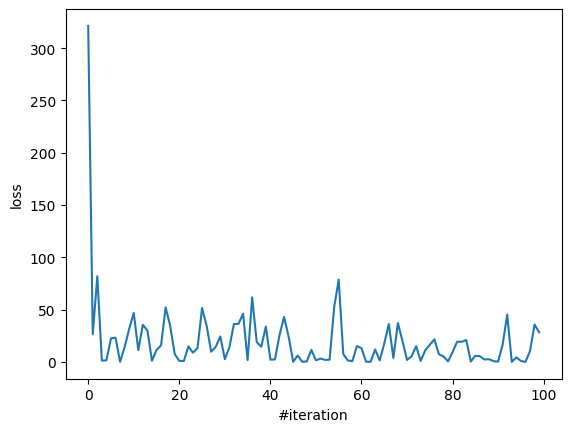

5.0688916746591595
[0.11688921779994682, 0.06569013718324529, 0.148139640526607, 1.9404744730261556]


In [122]:
def initialize_params():
    w1, w2, w3, b = [0, 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]
    return w1, w2, w3, b

def implement_linear_regression(X_feature, y, epoch_max = 50, lr = 1e-5):
    losses = []
    weights = initialize_params()
    N = len(y)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample - row i
            features_i = X_feature[i]
            y_true = y[i]

            # compute output
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss(y_true, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y_true, y_hat)

            # update w1, w2, w3, b
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss)

    return losses, weights

def predict(X_features, weights):
    # implement x0 x1 x2 x3
    return sum([x * w for x, w in zip(X_features, weights)])

def compute_loss(y_true, y_hat):
    return (y_true - y_hat) ** 2

def compute_gradient_w(X_features, y_true, y_hat):
    return [2 * x * (y_hat - y_true) for x in X_features]


def update_weight(weights, dl_dweights, lr):
    return [w - lr * dw for w, dw in zip(weights, dl_dweights)]
    
def compute_gradient_wi(x, y_true, y_hat):
    return 2 * x * (y_hat - y_true)

def compute_gradient_b(y_true, y_hat):
    return 2 * (y_hat - y_true)

def update_weight_wi(w, dl_dw, lr):
    return w - lr * dl_dw

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

(losses, weights) = implement_linear_regression (X, y)

plt.plot(losses[0:100])
plt.xlabel('#iteration')
plt.ylabel('loss')
plt.show()

print(losses[9999])

print ( weights )



In [82]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X, y = prepare_data(file_name_dataset)
(losses, w1, w2, w3, b) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print (f'predicted sales is { sales }')

predicted sales is 8.176413319549823


In [83]:
def compute_loss_mae(y_hat, y):
    return np.abs(y_hat - y)

l = compute_loss_mae(y_hat=1, y=0.5)
print(l)


0.5


N samples training

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

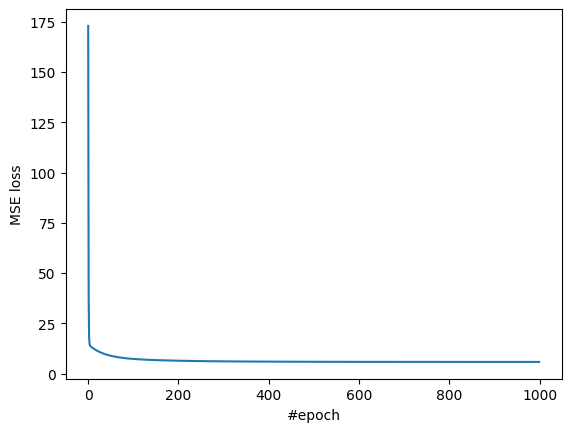

In [108]:
def implement_linear_regression_nsamples(X, y, epoch_max = 50, lr = 1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y)
    for epoch in range(epoch_max):
        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0
        
        for i in range(N):
            # get sample
            x1 = X[0][i]
            x2 = X[1][i]
            x3 = X[2][i]
            y_true = y[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            loss = compute_loss(y_hat, y_true)
            
            #a accumulate loss
            loss_total += loss
            
            # compute gradient
            dl_dw1 = compute_gradient_wi(x1, y_true, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y_true, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y_true, y_hat)
            dl_db = compute_gradient_b(y_true, y_hat)
            
            # accumulate gradient
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # update weight
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        # compute loss
        avg_loss = loss_total / N
        losses.append(avg_loss)

    return losses, w1, w2, w3, b

(losses, w1, w2, w3, b) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

print(losses)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MSE loss')
plt.show()



In [111]:
X , y = prepare_data(file_name_dataset)
# using MSE loss
(losses,w1, w2, w3, b) = implement_linear_regression_nsamples(X , y ,epoch_max =1000 ,lr=1e-5)

print ( w1 , w2 , w3 )

0.06710990754044266 0.15756173831487585 0.029619799386084403
